# Using iceflow with icepyx to Generate an Elevation Timeseries

This notebook shows how to produce a harmonized elevation timeseries across all iceflow-supported datasets along with ICESat-2 data using [icepyx](https://github.com/icesat2py/icepyx).

If this is your first time using `iceflow`, we recommend starting with the [NSIDC Iceflow example Jupyter Notebook](https://iceflow.readthedocs.io/en/latest/iceflow-example.html) first.

Similarly, if you are new to `icepyx`, we suggest reviewing the [icepyx documentation](https://icepyx.readthedocs.io/en/latest/) for more information about how to use `icepyx`.

## Scenario: assessing ice surface elevation change near Sermeq Kujalleq (Jakobshavn Isbrae)

In this notebook, we will focus on a small area near Sermeq Kujalleq (Jakobshavn Isbrae).

This notebook will demonstrate how to:

* Search for and download all iceflow-supported data for our area of interest and timeframe.
* Search for and download ICESat-2 data using `icepyx`.
* Average elevation data over our area of interest at a weekly resolution.
* Plot the results as a timeseries.

### Import required packages

We will import several packages needed to perform our analysis:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
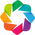

In [1]:
# Imports
from __future__ import annotations

import datetime as dt
from pathlib import Path

import dask.dataframe as dd
import icepyx as ipx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from nsidc.iceflow import (
    BoundingBox,
    DatasetSearchParameters,
    IceflowDataFrame,
    download_iceflow_results,
    find_iceflow_data,
    make_iceflow_parquet,
)

### Search for and download iceflow-supported data for our area of interest and timeframe.

We first need to define some constants, including our download path, ITRF, and filter parameters. These will be used throughout the rest of the notebook.

**Note that the data supported by `iceflow` and `icepyx` can be very large! This tutorial will download ~2GB worth of data to local disk.**

In [2]:
# Constants

# All of our data will be downloaded to this location.
OUTPUT_DIR = Path("./downloaded-data/")

# ICESat2 data products use ITRF2014 (e.g., see https://nsidc.org/data/atl06/versions/6):
# > WGS 84 ellipsoid, ITRF2014 reference frame
# NOTE/TODO: This is expected to change in the near future! ICESat2 release
# 7, scheduled for spring 2025, is expected to be referenced to ITRF2020.
ICESAT2_ITRF = "ITRF2014"

# This bounding box covers an area near Sermeq Kujalleq (Jakobshavn Isbrae)
BBOX = BoundingBox(
    lower_left_lon=-49.149,
    lower_left_lat=69.186,
    upper_right_lon=-48.949,
    upper_right_lat=69.238,
)

# Range of dates we want to evaluate
DATE_RANGE = (dt.date(2007, 1, 1), dt.date(2024, 10, 28))

Next we will use the `find_iceflow_data` function from the `iceflow` API to find data matching our area of interest.

By default, `DatasetSearchParameters` will include all `iceflow` supported datasets, unless one or more are specified as a filter with the `datasets` kwarg. There may be warnings raised about there not being search results for specific datasets supported by `iceflow`.

In [3]:
search_results = find_iceflow_data(
    dataset_search_params=DatasetSearchParameters(
        bounding_box=BBOX,
        temporal=DATE_RANGE,
    ),
)
len(search_results)

2025-05-23 14:44:49.688 | WARNING  | nsidc.iceflow.data.fetch:_find_iceflow_data:53 - Found no results for dataset.short_name='ILVIS2' dataset.version='1' with bounding_box=BoundingBox(lower_left_lon=-49.149, lower_left_lat=69.186, upper_right_lon=-48.949, upper_right_lat=69.238) temporal=(datetime.date(2007, 1, 1), datetime.date(2024, 10, 28))


6

Now download the matching files to disk using `download_iceflow_results`.

**Note: This next step may take a while, and will download data to your local disk.**

In [4]:
downloaded_files = download_iceflow_results(search_results, output_dir=OUTPUT_DIR)

2025-05-23 14:44:54.927 | INFO     | nsidc.iceflow.data.fetch:_download_iceflow_search_result:72 - Downloading 4 granules to downloaded-data/ILATM1B_1.


2025-05-23 14:44:54.931 | INFO     | nsidc.iceflow.data.fetch:_download_iceflow_search_result:72 - Downloading 14 granules to downloaded-data/ILATM1B_2.


2025-05-23 14:44:54.933 | INFO     | nsidc.iceflow.data.fetch:_download_iceflow_search_result:72 - Downloading 13 granules to downloaded-data/BLATM1B_1.


2025-05-23 14:44:54.935 | INFO     | nsidc.iceflow.data.fetch:_download_iceflow_search_result:72 - Downloading 2 granules to downloaded-data/ILVIS2_2.


2025-05-23 14:44:54.936 | INFO     | nsidc.iceflow.data.fetch:_download_iceflow_search_result:72 - Downloading 8 granules to downloaded-data/GLAH06_034.


Finally, we will create a parquet dataset using `make_iceflow_parquet`.Writing data to a parquet dataset allows `dask` (which we will use later!) to read the chunks of data it needs to do calculations (e.g., `mean`) without needing to read all of the data into memory at once. This is important because `iceflow` can find many millions of data points for even small areas of interest!

This function transforms all data found in the `data_dir` to the provided `target_itrf`, further facilitating analysis across many datasets. 

**Note: This next step may take a while**

In [5]:
parquet_path = make_iceflow_parquet(
    data_dir=OUTPUT_DIR,
    target_itrf=ICESAT2_ITRF,
    overwrite=True,
)

2025-05-23 14:44:54.940 | INFO     | nsidc.iceflow.api:make_iceflow_parquet:85 - Removing existing iceflow.parquet


Now we read the data stored in the parquet dataset using dask:

In [6]:
iceflow_df = dd.read_parquet(parquet_path)

# Ensure that our index is set as a datetime object
iceflow_df = iceflow_df.reset_index()
iceflow_df["utc_datetime"] = dd.to_datetime(iceflow_df["utc_datetime"])
iceflow_df = iceflow_df.set_index("utc_datetime")

iceflow_df.head()

,latitude,longitude,elevation,dataset
utc_datetime,,,,
2007-03-12 06:39:58.970415,50.105011,-41.965750,40.621659,GLAH06v034
2007-03-12 06:39:58.995415,50.106557,-41.966118,39.633659,GLAH06v034
2007-03-12 06:39:59.220415,50.120483,-41.969395,40.284658,GLAH06v034
2007-03-12 06:39:59.320415,50.126654,-41.970829,40.168658,GLAH06v034
2007-03-12 06:40:00.520415,50.200840,-41.988417,39.976656,GLAH06v034


###  Search for and download ICESat-2 data using `icepyx`

Next, we will use icepyx to find [ATL06](https://nsidc.org/data/atl06/versions/6) data for the same area of interest and timeframe. 

To learn more about `icepyx.Query`, which is used below, see the [documentation](https://icepyx.readthedocs.io/en/latest/_icepyx/icepyx.Query.html#icepyx.Query).

In [7]:
# We will compare the ILATM1B data to ATL06 data from October 2018.
result = ipx.Query(
    "ATL06",
    [
        BBOX.lower_left_lon,
        BBOX.lower_left_lat,
        BBOX.upper_right_lon,
        BBOX.upper_right_lat,
    ],
    DATE_RANGE,
)
result

Now we place an order and download the results.  Note that this may take a while to download data to local disk.

**Note: These next steps may take a while**

In [8]:
result.order_granules(subset=True)

Harmony job ID:  c82005f8-2e04-4375-9196-8adc431c4d4c


Initial status of your harmony order request: running


Job ID,Type,Status,Details
c82005f8-2e04-4375-9196-8adc431c4d4c,subset,running,""">View Details"


In [9]:
result.download_granules("downloaded-data/ATL06/")

Your harmony job status is still running. Please continue waiting... this may take a few moments.
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

downloaded-data/ATL06/100842304_ATL06_20181111054901_06660105_006_02_subsetted.h5


downloaded-data/ATL06/100842305_ATL06_20181217152316_12220103_006_02_subsetted.h5


downloaded-data/ATL06/100842307_ATL06_20190115135914_02770203_006_02_subsetted.h5


downloaded-data/ATL06/100842308_ATL06_20190318110313_12220203_006_02_subsetted.h5
downloaded-data/ATL06/100842306_ATL06_20190112025232_02240205_006_02_subsetted.h5
downloaded-data/ATL06/100842311_ATL06_20190511210825_06660305_006_02_subsetted.h5


downloaded-data/ATL06/100842312_ATL06_20190617064249_12220303_006_02_subsetted.h5
downloaded-data/ATL06/100842314_ATL06_20190810164806_06660405_006_02_subsetted.h5


downloaded-data/ATL06/100842315_ATL06_20190916022239_12220403_006_02_subsetted.h5


downloaded-data/ATL06/100842318_ATL06_20191109122800_06660505_006_01_subsetted.h5
downloaded-data/ATL06/100842316_ATL06_20191011135158_02240505_006_02_subsetted.h5
downloaded-data/ATL06/100842322_ATL06_20200208080743_06660605_006_01_subsetted.h5


downloaded-data/ATL06/100842320_ATL06_20200110093142_02240605_006_01_subsetted.h5


downloaded-data/ATL06/100842324_ATL06_20200410051129_02240705_006_02_subsetted.h5


downloaded-data/ATL06/100842319_ATL06_20191215220228_12220503_006_01_subsetted.h5


downloaded-data/ATL06/100842323_ATL06_20200315174217_12220603_006_01_subsetted.h5
downloaded-data/ATL06/100842327_ATL06_20200614132201_12220703_006_01_subsetted.h5


downloaded-data/ATL06/100842326_ATL06_20200509034734_06660705_006_01_subsetted.h5


downloaded-data/ATL06/100842330_ATL06_20200807232719_06660805_006_01_subsetted.h5


downloaded-data/ATL06/100842331_ATL06_20200913090149_12220803_006_02_subsetted.h5


downloaded-data/ATL06/100842332_ATL06_20201008203102_02240905_006_01_subsetted.h5


downloaded-data/ATL06/100842333_ATL06_20201106190706_06660905_006_01_subsetted.h5
downloaded-data/ATL06/100842334_ATL06_20201213044139_12220903_006_01_subsetted.h5


downloaded-data/ATL06/100842339_ATL06_20210408115050_02241105_006_02_subsetted.h5


downloaded-data/ATL06/100842335_ATL06_20210107161057_02241005_006_01_subsetted.h5
downloaded-data/ATL06/100842343_ATL06_20210708073039_02241205_006_01_subsetted.h5


downloaded-data/ATL06/100842337_ATL06_20210205144704_06661005_006_01_subsetted.h5
downloaded-data/ATL06/100842338_ATL06_20210314002135_12221003_006_01_subsetted.h5
downloaded-data/ATL06/100842342_ATL06_20210612200124_12221103_006_01_subsetted.h5


downloaded-data/ATL06/100842345_ATL06_20210806060645_06661205_006_01_subsetted.h5
downloaded-data/ATL06/100842346_ATL06_20211007031039_02241305_006_01_subsetted.h5
downloaded-data/ATL06/100842341_ATL06_20210507102653_06661105_006_01_subsetted.h5


downloaded-data/ATL06/100842355_ATL06_20220611024058_12221503_006_01_subsetted.h5


downloaded-data/ATL06/100842350_ATL06_20220105225028_02241405_006_01_subsetted.h5
downloaded-data/ATL06/100842348_ATL06_20211105014647_06661305_006_01_subsetted.h5


downloaded-data/ATL06/100842349_ATL06_20211211112116_12221303_006_01_subsetted.h5


downloaded-data/ATL06/100842352_ATL06_20220203212633_06661405_006_01_subsetted.h5


downloaded-data/ATL06/100842358_ATL06_20220804124627_06661605_006_01_subsetted.h5


downloaded-data/ATL06/100842356_ATL06_20220706141022_02241605_006_02_subsetted.h5


downloaded-data/ATL06/100842354_ATL06_20220505170624_06661505_006_01_subsetted.h5


downloaded-data/ATL06/100842353_ATL06_20220312070106_12221403_006_01_subsetted.h5
downloaded-data/ATL06/100842359_ATL06_20220909222056_12221603_006_01_subsetted.h5


downloaded-data/ATL06/100842369_ATL06_20230503234538_06661905_006_03_subsetted.h5
downloaded-data/ATL06/100842360_ATL06_20221005095006_02241705_006_01_subsetted.h5
downloaded-data/ATL06/100842362_ATL06_20221103082608_06661705_006_01_subsetted.h5


downloaded-data/ATL06/100842364_ATL06_20230104052948_02241805_006_02_subsetted.h5
downloaded-data/ATL06/100842363_ATL06_20221209180033_12221703_006_02_subsetted.h5


downloaded-data/ATL06/100842367_ATL06_20230405010947_02241905_006_02_subsetted.h5


downloaded-data/ATL06/100842366_ATL06_20230202040603_06661805_006_02_subsetted.h5


downloaded-data/ATL06/100842370_ATL06_20230609091949_12221903_006_02_subsetted.h5
downloaded-data/ATL06/100842374_ATL06_20230908045912_12222003_006_02_subsetted.h5


downloaded-data/ATL06/100842373_ATL06_20230802192451_06662005_006_02_subsetted.h5


downloaded-data/ATL06/100842378_ATL06_20231208003854_12222103_006_03_subsetted.h5
downloaded-data/ATL06/100842376_ATL06_20231101150428_06662105_006_01_subsetted.h5


downloaded-data/ATL06/100842379_ATL06_20240102120809_02242205_006_01_subsetted.h5


downloaded-data/ATL06/100842382_ATL06_20240402074729_02242305_006_01_subsetted.h5
downloaded-data/ATL06/100842381_ATL06_20240131104358_06662205_006_01_subsetted.h5
downloaded-data/ATL06/100842385_ATL06_20240702032717_02242405_006_01_subsetted.h5


downloaded-data/ATL06/100842389_ATL06_20240930230647_02242505_006_02_subsetted.h5
downloaded-data/ATL06/100842384_ATL06_20240501062333_06662305_006_01_subsetted.h5
downloaded-data/ATL06/100842387_ATL06_20240731020304_06662405_006_01_subsetted.h5


downloaded-data/ATL06/100842388_ATL06_20240905113742_12222403_006_01_subsetted.h5


[PosixPath('downloaded-data/ATL06/100842304_ATL06_20181111054901_06660105_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842305_ATL06_20181217152316_12220103_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842307_ATL06_20190115135914_02770203_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842308_ATL06_20190318110313_12220203_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842306_ATL06_20190112025232_02240205_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842311_ATL06_20190511210825_06660305_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842312_ATL06_20190617064249_12220303_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842314_ATL06_20190810164806_06660405_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842315_ATL06_20190916022239_12220403_006_02_subsetted.h5'),
 PosixPath('downloaded-data/ATL06/100842318_ATL06_20191109122800_06660505_006_01_subsetted.h5'),
 PosixPath('downloaded-data/AT

###  Read ICESat-2 data into `xarray` and `pandas`

Next, we will use [icepyx.Read](https://icepyx.readthedocs.io/en/latest/_icepyx/icepyx.Read.html#icepyx.Read) to read the data into an [xarray Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html).

Note that the code below wraps the reading of each file in a `try/except` block because of a known issue with subsetting. See https://github.com/icesat2py/icepyx/issues/576 for more information.

In [10]:
datasets = []
for file in Path("downloaded-data/ATL06/").glob("*.h5"):
    try:
        reader = ipx.Read(str(file))
        reader.variables.append(var_list=["h_li", "latitude", "longitude"])
        ds = reader.load()
        datasets.append(ds)
    except Exception:
        print(f"{file=} contains an error and will not be read")
        continue

    len(datasets)

file=PosixPath('downloaded-data/ATL06/100842369_ATL06_20230503234538_06661905_006_03_subsetted.h5') contains an error and will not be read
file=PosixPath('downloaded-data/ATL06/100842334_ATL06_20201213044139_12220903_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842297_ATL06_20240930230647_02242505_006_02_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842307_ATL06_20190115135914_02770203_006_02_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842267_ATL06_20220909222056_12221603_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842293_ATL06_20240702032717_02242405_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842243_ATL06_20210107161057_02241005_006_01_subsetted.h5') contains an error and will not be read
file=PosixPath('downloaded-data/ATL06/100842345_ATL06_20210806060645_06661205_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842230_ATL06_20200208080743_06660605_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842292_ATL06_20240501062333_06662305_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842384_ATL06_20240501062333_06662305_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842322_ATL06_20200208080743_06660605_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842215_ATL06_20190115135914_02770203_006_02_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842277_ATL06_20230503234538_06661905_006_03_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842355_ATL06_20220611024058_12221503_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842385_ATL06_20240702032717_02242405_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842263_ATL06_20220611024058_12221503_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842359_ATL06_20220909222056_12221603_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842242_ATL06_20201213044139_12220903_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842282_ATL06_20230908045912_12222003_006_02_subsetted.h5') contains an error and will not be read
file=PosixPath('downloaded-data/ATL06/100842253_ATL06_20210806060645_06661205_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842335_ATL06_20210107161057_02241005_006_01_subsetted.h5') contains an error and will not be read


file=PosixPath('downloaded-data/ATL06/100842374_ATL06_20230908045912_12222003_006_02_subsetted.h5') contains an error and will not be read
file=PosixPath('downloaded-data/ATL06/100842389_ATL06_20240930230647_02242505_006_02_subsetted.h5') contains an error and will not be read


In [11]:
ds = xr.concat(datasets, dim="gran_idx")
ds.head()

<xarray.Dataset> Size: 5kB
Dimensions:              (gran_idx: 5, spot: 5, photon_idx: 5)
Coordinates:
  * photon_idx           (photon_idx) int64 40B 0 1 2 3 4
  * spot                 (spot) uint8 5B 1 2 3 4 5
  * gran_idx             (gran_idx) uint64 40B 122201 66612 66603 66621 122212
    source_file          (gran_idx) <U81 2kB 'downloaded-data/ATL06/100842216...
    delta_time           (gran_idx, photon_idx) datetime64[ns] 200B 2019-03-1...
Data variables:
    sc_orient            (gran_idx) int8 5B 0 0 0 1 0
    cycle_number         (gran_idx) int8 5B 2 13 4 22 13
    rgt                  (gran_idx) int16 10B 1222 666 666 666 1222
    atlas_sdp_gps_epoch  (gran_idx) datetime64[ns] 40B 2018-01-01T00:00:18 .....
    data_start_utc       (gran_idx) datetime64[ns] 40B 2019-03-18T11:03:27.34...
    data_end_utc         (gran_idx) datetime64[ns] 40B 2019-03-18T11:08:38.95...
    h_li                 (spot, gran_idx, photon_idx) float32 500B nan ... nan
    latitude             (spot, gran_idx, photon_idx) float64 1kB nan ... nan
    longitude            (spot, gran_idx, photon_idx) float64 1kB nan ... nan
    gt                   (gran_idx, spot) object 200B nan nan ... 'gt2r' 'gt3l'
Attributes:
    data_product:  ATL06
    Description:   The land_ice_height group contains the primary set of deri...
    data_rate:     Data within this group are sparse.  Data values are provid...

`icepyx` reads ICESat-2 data as an xarray dataset. `xarray` is a powerful tool and the data is ready to use in this format, but to simplify things for this notebook and make the data more compatible with `iceflow`, the next step will convert the data into an `iceflow`-compatible [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

The first step is to rename the variables to be consistent with how `iceflow` identifies the elevation and time fields:

In [12]:
ds = ds.rename({"h_li": "elevation", "delta_time": "utc_datetime"})

The following code block converts the `xarray` dataset into an iceflow dataframe:

In [13]:
spot_dfs = []
for spot in ds.spot.data.flatten():
    df = pd.DataFrame.from_dict(
        {
            "elevation": ds.sel(spot=spot).elevation.data.flatten(),
            "latitude": ds.sel(spot=spot).latitude.data.flatten(),
            "longitude": ds.sel(spot=spot).longitude.data.flatten(),
            "utc_datetime": ds.sel(spot=spot).utc_datetime.data.flatten(),
            "spot": [spot] * len(ds.sel(spot=spot).elevation.data.flatten()),
            "ITRF": ICESAT2_ITRF,
        },
    )
    spot_dfs.append(df)


df = pd.concat(spot_dfs, sort=True)
# Drop rows where lat, lon, or elev are missing.
df = df.dropna(subset=["latitude", "longitude", "elevation"], how="any")
df = df.set_index("utc_datetime")
# Cast the df as an IceflowDataFrame.
# The `atl06_df` can now be used with e.g., `iceflow`'s ITRF conversion function
# to perform plate motion model adjustments if desired.
atl06_df = IceflowDataFrame(df)
atl06_df.head()

,ITRF,elevation,latitude,longitude,spot
utc_datetime,,,,,
2024-01-31 10:46:52.454758208,ITRF2014,862.040039,69.237897,-49.054458,1
2024-01-31 10:46:52.457587232,ITRF2014,861.626038,69.237719,-49.054519,1
2024-01-31 10:46:52.460414560,ITRF2014,861.156128,69.237541,-49.054580,1
2024-01-31 10:46:52.463239264,ITRF2014,860.724731,69.237362,-49.054642,1
2024-01-31 10:46:52.466060704,ITRF2014,860.350647,69.237184,-49.054704,1


The ATL06 data contains some negative elevation values, as we see printed below. We will filter these out, as we expect positive elevations.

In [14]:
print(atl06_df.elevation.min())

# Filter out negative values. We expect positive elevations.
atl06_df = atl06_df[atl06_df.elevation > 0]

-1320.41162109375


### Average elevation data over our area of interest at a weekly resolution

In this next step, we will resample the ATL06 and `iceflow` data to a weekly resolution, taking the mean of elevation over our area of interest. This will provide us with one data point per week where data is available, giving us a general idea of how the elevation of our area of interest changes over time. First we resample ATL06 data to a weekly mean:

In [15]:
atl06_avg_df = atl06_df[["elevation"]].resample("W").mean()
atl06_avg_df = atl06_avg_df.dropna(how="any")
atl06_avg_df.head()

,elevation
utc_datetime,
2018-11-11,876.653491
2018-12-23,887.003014
2019-01-13,836.233506
2019-03-24,865.448348
2019-05-12,877.559574


And now we resample the iceflow data to a weekly mean:

In [16]:
iceflow_df_sampled = iceflow_df.repartition(freq="1W")
iceflow_df_sampled = iceflow_df_sampled.dropna(how="any")

iceflow_df_sampled = iceflow_df_sampled[iceflow_df_sampled.elevation > 0]

iceflow_avg = iceflow_df_sampled.resample("W").agg(
    {
        "elevation": "mean",
        "dataset": lambda x: ", ".join(x.astype("str").unique()),
    }
)
iceflow_avg = iceflow_avg.replace([np.inf, -np.inf], np.nan)
iceflow_avg = iceflow_avg.dropna(how="any")
iceflow_avg = iceflow_avg.compute()

iceflow_avg.head()

,elevation,dataset
utc_datetime,,
2007-03-18,657.922769,GLAH06v034
2007-10-07,438.062308,GLAH06v034
2008-02-17,181.279161,GLAH06v034
2008-06-29,888.758989,BLATM1Bv1
2008-07-06,879.285982,BLATM1Bv1


### Plot the results as a timeseries

Now we will use [matplotlib](https://matplotlib.org/) to plot the results as a timeseries:

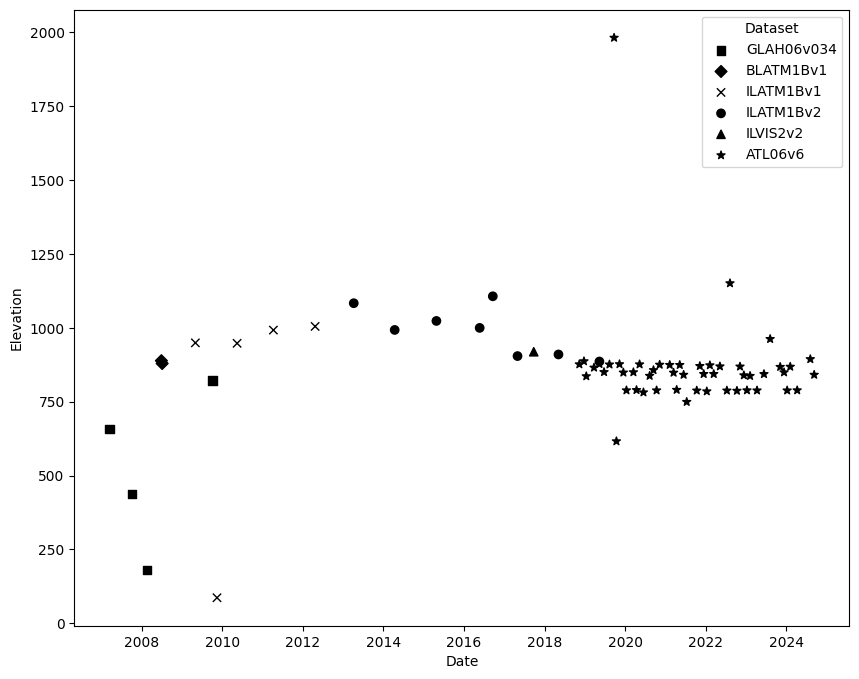

In [17]:
%matplotlib inline

# We will use a unique marker for each dataset
iceflow_marker_map = {
    "GLAH06v034": "s",
    "BLATM1Bv1": "D",
    "ILATM1Bv1": "x",
    "ILATM1Bv2": "o",
    "ILVIS2v1": "v",
    "ILVIS2v2": "^",
}

fig = plt.figure(figsize=(10, 8))

for dataset, marker in iceflow_marker_map.items():
    subset = iceflow_avg[iceflow_avg.dataset == dataset]
    if subset.elevation.any():
        plt.scatter(
            subset.index,
            subset.elevation,
            marker=marker,
            label=dataset,
            linestyle="",
            color="black",
        )

plt.scatter(
    atl06_avg_df.index,
    atl06_avg_df.elevation,
    color="black",
    marker="*",
    label="ATL06v6",
    linestyle="",
)

plt.xlabel("Date")
plt.ylabel("Elevation")
plt.legend(title="Dataset")

## Conclusions

In this notebook, we found and analyzed laser altimetry data from a variety of datasets using `iceflow` and `icepyx`. 

In the timeseries plot above, we can see how the surface elevation of a small area near Sermeq Kujalleq (Jakobshavn Isbrae) changes over time.

Note that this analysis was relatively simple. Although the data and plot above give us an idea of surface elevation changes, it should be noted that there are still a number of things a researcher should consider when doing an analysis across many datasets over time. To further this analysis, we may want to consider doing one or more of the following:

* Outlier detection and filtering
* Cross-calibration of data between sensors/datasets
* Plate motion model coordinate propagation (see the [NSIDC Iceflow example Jupyter Notebook](https://iceflow.readthedocs.io/en/latest/iceflow-example.html) for an example of how to do this)
* Account for spatial variability within our region of interest